In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import numpy as np

In [235]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('./Входные данные/signals.csv',header=None)

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
0,168,3642.317,-107.175,0.558,0.595,0.519,0.742,0.664,0.467,0.426,...,0.606,0.523,0.607,0.629,0.664,-1,-1,-1,-1,-1
1,307,4034.298,-668.198,0.650,0.457,0.572,0.644,0.581,0.525,0.645,...,0.397,0.579,0.636,0.570,0.530,-1,-1,-1,-1,-1
2,668,4358.001,1703.199,0.638,0.621,0.646,0.495,0.510,0.611,0.574,...,0.569,0.587,0.541,0.412,0.519,-1,-1,-1,-1,-1
3,229,2786.060,75.125,0.917,0.917,0.916,0.912,0.908,0.905,0.904,...,0.943,0.943,0.943,0.943,0.943,-1,-1,-1,-1,-1
4,316,988.637,-492.056,0.359,0.364,0.379,0.396,0.404,0.405,0.392,...,0.626,0.606,0.629,0.674,0.727,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,498,2648.039,-1611.818,0.633,0.550,0.548,0.531,0.621,0.565,0.628,...,0.515,0.642,0.373,0.517,0.520,-1,-1,-1,-1,-1
756,575,1763.934,67.286,0.842,0.852,0.859,0.865,0.870,0.877,0.876,...,0.990,0.985,0.985,0.986,0.986,-1,-1,-1,-1,-1
757,430,2138.580,1029.394,0.777,0.789,0.800,0.808,0.817,0.824,0.831,...,0.993,0.994,0.995,0.993,0.990,-1,-1,-1,-1,-1
758,722,4078.672,971.900,0.405,0.475,0.503,0.370,0.472,0.481,0.566,...,0.544,0.643,0.489,0.391,0.463,-1,-1,-1,-1,-1


In [44]:
labeled = df[df[5003] != -1]  #.iloc[:,5003:].sample(50)

In [45]:
labeled.iloc[2,3:5002].values.T

array([0.389, 0.407, 0.413, ..., 0.998, 0.999, 1.   ])

In [88]:
labeled

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
8,730,1011.066,1100.473,0.570,0.575,0.575,0.571,0.565,0.575,0.579,...,0.855,0.855,0.835,0.812,0.799,6,-1,1750,-1,-1
31,673,2520.621,-1655.089,0.662,0.582,0.589,0.637,0.443,0.718,0.524,...,0.500,0.508,0.535,0.538,0.408,8,0,-1,-1,-1
33,520,2251.706,3314.560,0.389,0.407,0.413,0.417,0.418,0.418,0.416,...,0.996,0.998,0.999,1.000,0.998,5,2222,-1,-1,-1
37,609,3748.843,730.305,0.756,0.765,0.781,0.793,0.804,0.811,0.819,...,0.947,0.948,0.951,0.955,0.954,1,1528,-1,4358,-1
45,419,4385.807,1247.944,0.498,0.566,0.520,0.458,0.555,0.795,0.546,...,0.529,0.550,0.626,0.550,0.584,7,-1,2414,-1,4999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,70,3980.074,2893.510,0.361,0.410,0.460,0.505,0.549,0.581,0.606,...,0.998,0.999,0.999,1.000,1.000,3,891,1358,-1,-1
737,665,1231.561,4289.523,0.599,0.691,0.713,0.716,0.714,0.710,0.708,...,0.884,0.875,0.863,0.846,0.821,5,-1,-1,-1,4303
739,471,2241.640,1116.144,0.664,0.664,0.668,0.669,0.674,0.679,0.686,...,0.949,0.950,0.950,0.950,0.951,1,-1,242,-1,-1
743,505,154.975,2778.515,0.920,0.922,0.922,0.920,0.919,0.918,0.916,...,0.982,0.982,0.982,0.982,0.982,5,-1,-1,-1,3917


In [90]:
d = labeled.iloc[:,1:3]

In [95]:
d[1]

8      1011.066
31     2520.621
33     2251.706
37     3748.843
45     4385.807
         ...   
736    3980.074
737    1231.561
739    2241.640
743     154.975
754    4229.294
Name: 1, Length: 109, dtype: float64

<AxesSubplot:xlabel='1', ylabel='2'>

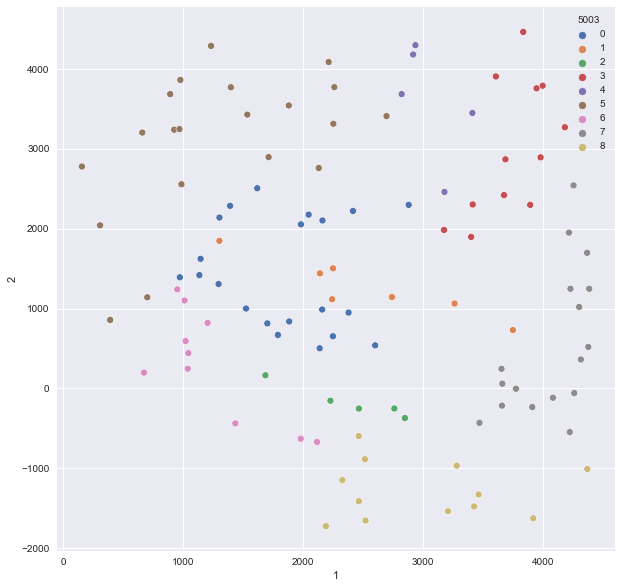

In [107]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
sns.scatterplot(data=d, x=d[1],y=d[2],hue=labeled.iloc[:,5003],palette='deep')

In [102]:
labeled.iloc[:,5003].nunique()

9

In [52]:
first_class = labeled[labeled.iloc[:,5003] == 1]

In [70]:
first_class

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
37,609,3748.843,730.305,0.756,0.765,0.781,0.793,0.804,0.811,0.819,...,0.947,0.948,0.951,0.955,0.954,1,1528,-1,4358,-1
115,608,2740.172,1144.527,0.944,0.948,0.952,0.954,0.957,0.959,0.960,...,1.000,0.999,0.999,0.999,0.999,1,-1,-1,-1,3517
292,2,2140.093,1440.787,0.787,0.787,0.787,0.787,0.787,0.787,0.787,...,0.873,0.873,0.873,0.873,0.873,1,62,191,-1,-1
408,37,3262.924,1062.520,0.829,0.829,0.830,0.831,0.832,0.833,0.835,...,0.967,0.967,0.967,0.967,0.966,1,-1,-1,4346,4681
468,304,1301.454,1848.102,0.845,0.859,0.872,0.879,0.883,0.886,0.888,...,0.986,0.983,0.980,0.975,0.974,1,-1,-1,4177,-1
709,432,2249.222,1503.572,0.830,0.833,0.836,0.839,0.843,0.848,0.852,...,0.966,0.965,0.963,0.962,0.961,1,400,-1,-1,-1
739,471,2241.640,1116.144,0.664,0.664,0.668,0.669,0.674,0.679,0.686,...,0.949,0.950,0.950,0.950,0.951,1,-1,242,-1,-1


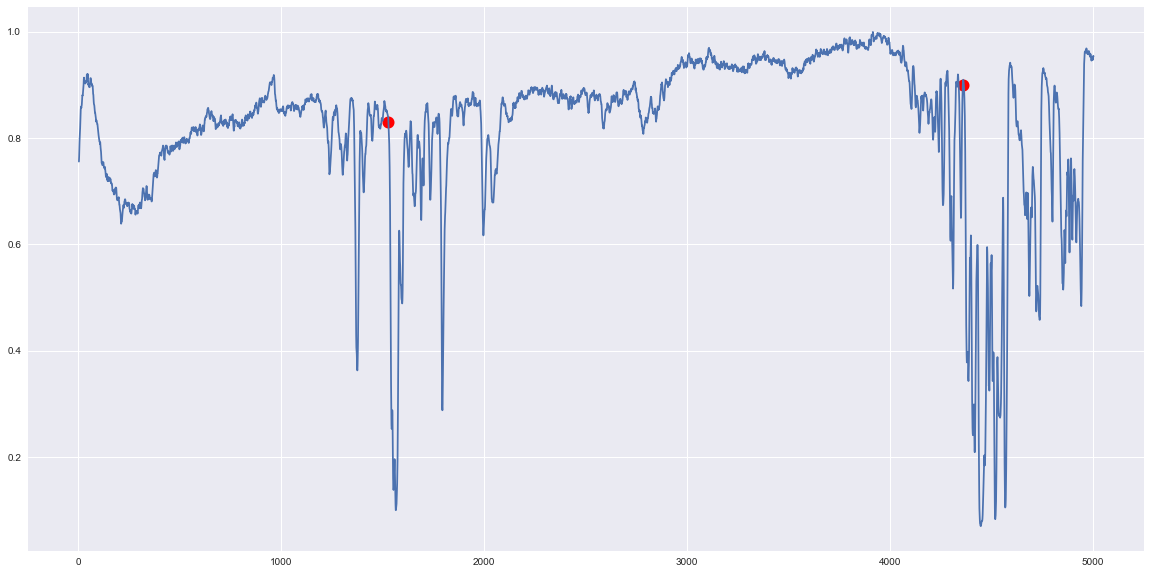

In [124]:
plt.figure(figsize=(20,10))
plt.plot(first_class.iloc[0,3:5003])
plt.scatter(1528,first_class.iloc[0,1528],linewidths=5,color='r')
plt.scatter(4358,first_class.iloc[0,4358],linewidths=5,color='r')

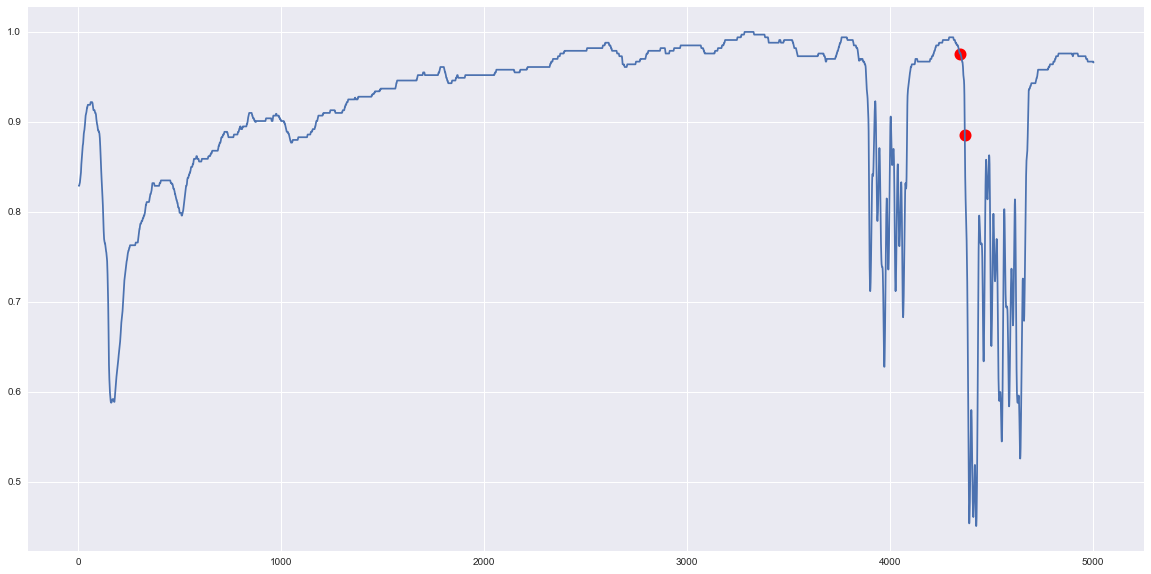

In [123]:
plt.figure(figsize=(20,10))
plt.plot(first_class.iloc[3,3:5003])
plt.scatter(4346,first_class.iloc[3,4346],linewidths=5,color='r')
plt.scatter(4368,first_class.iloc[3,4368],linewidths=5,color='r')

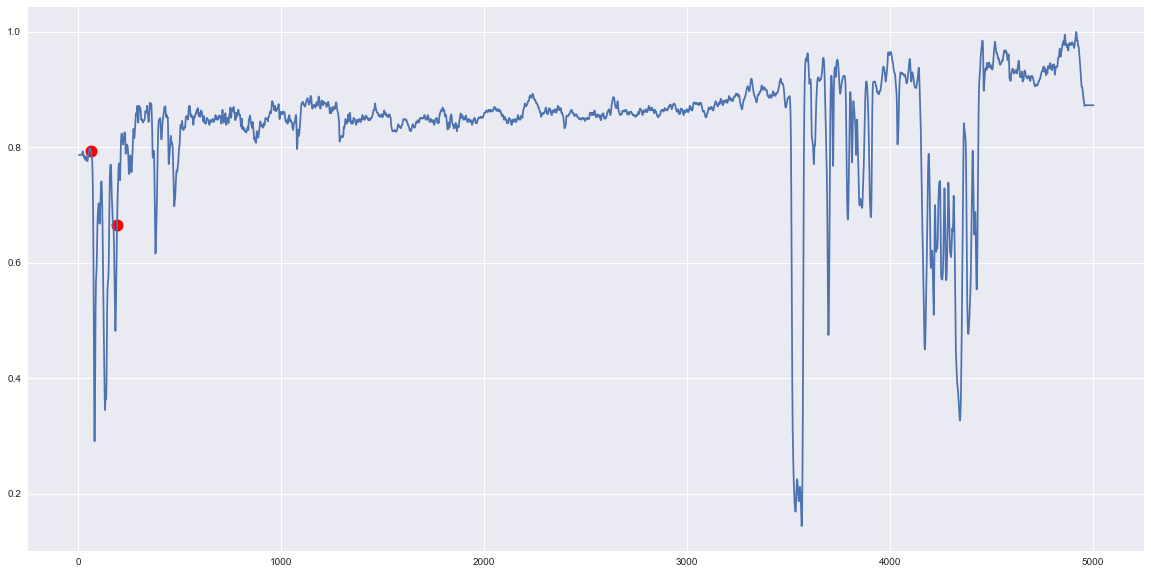

In [122]:
plt.figure(figsize=(20,10))
plt.plot(first_class.iloc[2,3:5003])
plt.scatter(62,first_class.iloc[2,62],linewidths=5,color='r')
plt.scatter(191,first_class.iloc[2,191],linewidths=5,color='r')

In [59]:
second_class = labeled[labeled.iloc[:,5003] == 2]
second_class

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
135,232,2464.802,-252.599,0.969,0.967,0.976,0.983,0.991,0.993,0.992,...,0.835,0.843,0.840,0.844,0.845,2,-1,3731,-1,-1
457,409,2760.720,-252.041,0.683,0.682,0.681,0.680,0.679,0.678,0.676,...,0.975,0.975,0.975,0.975,0.975,2,3168,-1,-1,-1
518,212,2848.530,-371.539,0.854,0.857,0.860,0.862,0.865,0.866,0.870,...,0.844,0.843,0.843,0.843,0.843,2,-1,-1,3115,3297
605,344,2227.523,-154.533,0.943,0.943,0.943,0.941,0.939,0.941,0.942,...,0.840,0.814,0.789,0.790,0.792,2,-1,-1,-1,4973
729,395,1685.143,163.545,0.857,0.858,0.858,0.859,0.863,0.866,0.867,...,0.978,0.970,0.969,0.971,0.972,2,2103,-1,4123,-1


In [62]:
third_class = labeled[labeled.iloc[:,5003] == 3]
third_class

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
97,563,3835.354,4464.590,0.698,0.701,0.705,0.715,0.725,0.734,0.744,...,0.997,0.998,0.998,0.998,0.996,3,278,-1,4267,-1
103,167,4182.841,3270.632,0.989,0.989,0.989,0.989,0.989,0.989,0.989,...,0.915,0.913,0.912,0.910,0.909,3,-1,-1,3737,-1
140,295,3687.088,2868.656,0.776,0.779,0.782,0.785,0.783,0.780,0.774,...,0.974,0.974,0.974,0.974,0.974,3,-1,-1,-1,3481
163,466,3400.829,1896.929,0.728,0.735,0.740,0.745,0.750,0.755,0.759,...,0.998,0.998,0.999,0.999,1.000,3,-1,626,-1,4287
231,61,3607.439,3906.768,0.747,0.765,0.781,0.797,0.811,0.822,0.831,...,0.994,0.993,0.993,0.993,0.994,3,737,-1,-1,-1
299,425,3997.399,3790.868,0.662,0.665,0.668,0.670,0.677,0.685,0.692,...,0.980,0.979,0.979,0.979,0.979,3,-1,-1,-1,3414
446,157,3174.818,1984.406,0.811,0.823,0.838,0.850,0.858,0.863,0.868,...,0.945,0.945,0.946,0.946,0.946,3,-1,955,4343,-1
504,267,3893.488,2297.987,0.805,0.808,0.812,0.816,0.816,0.817,0.818,...,1.000,1.000,1.000,1.000,1.000,3,-1,1076,-1,-1
526,103,3946.591,3758.085,0.637,0.645,0.650,0.657,0.662,0.665,0.667,...,0.982,0.981,0.980,0.979,0.977,3,-1,596,-1,3741
595,222,3414.183,2303.150,0.823,0.824,0.827,0.827,0.825,0.822,0.819,...,0.998,0.997,0.997,0.997,0.997,3,491,-1,4230,-1


In [64]:
fourth_class = labeled[labeled.iloc[:,5003] == 4]
fourth_class

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
126,544,3178.600,2460.564,0.737,0.747,0.756,0.759,0.762,0.765,0.768,...,0.980,0.981,0.982,0.985,0.987,4,394,-1,3481,-1
235,188,2917.392,4181.777,0.544,0.567,0.585,0.591,0.598,0.607,0.610,...,0.811,0.817,0.821,0.824,0.827,4,-1,-1,-1,4658
250,746,3411.575,3449.342,0.759,0.762,0.763,0.763,0.762,0.759,0.756,...,0.992,0.993,0.993,0.994,0.995,4,231,-1,3866,-1
257,104,2936.438,4298.671,0.952,0.947,0.941,0.944,0.947,0.950,0.952,...,0.963,0.961,0.958,0.957,0.956,4,-1,3509,-1,4761
342,613,2821.356,3685.309,0.798,0.804,0.808,0.812,0.816,0.820,0.826,...,0.960,0.960,0.961,0.961,0.961,4,-1,3000,-1,4441


In [67]:
fifth_class = labeled[labeled.iloc[:,5003] == 5]
fifth_class

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
33,520,2251.706,3314.560,0.389,0.407,0.413,0.417,0.418,0.418,0.416,...,0.996,0.998,0.999,1.000,0.998,5,2222,-1,-1,-1
50,398,924.555,3239.586,0.954,0.953,0.954,0.955,0.955,0.956,0.956,...,0.706,0.703,0.702,0.701,0.701,5,-1,3869,-1,-1
130,656,1711.697,2896.419,0.854,0.835,0.828,0.818,0.825,0.831,0.824,...,0.997,0.993,0.982,0.968,0.980,5,1989,-1,-1,3970
149,470,975.838,3863.417,0.899,0.898,0.896,0.897,0.897,0.898,0.896,...,0.899,0.898,0.894,0.897,0.897,5,-1,3349,-1,-1
240,533,2260.090,3772.289,0.717,0.706,0.703,0.702,0.703,0.708,0.712,...,0.948,0.945,0.938,0.946,0.961,5,-1,2989,-1,-1
263,50,306.291,2041.970,0.967,0.966,0.966,0.964,0.963,0.963,0.962,...,0.997,0.997,0.998,0.998,0.998,5,-1,2790,-1,-1
277,85,2212.489,4087.615,0.992,0.991,0.995,0.999,1.000,0.999,0.998,...,0.673,0.674,0.675,0.674,0.673,5,-1,-1,3938,4396
285,41,2130.055,2760.368,0.957,0.953,0.954,0.956,0.957,0.955,0.950,...,0.985,0.981,0.980,0.972,0.967,5,2235,-1,-1,-1
309,649,891.327,3685.553,0.996,0.995,0.994,0.994,0.994,0.993,0.994,...,0.990,0.990,0.991,0.991,0.990,5,2049,-1,-1,4221
375,183,1397.179,3771.231,0.594,0.577,0.560,0.549,0.541,0.530,0.522,...,0.644,0.649,0.648,0.638,0.626,5,-1,3195,-1,-1


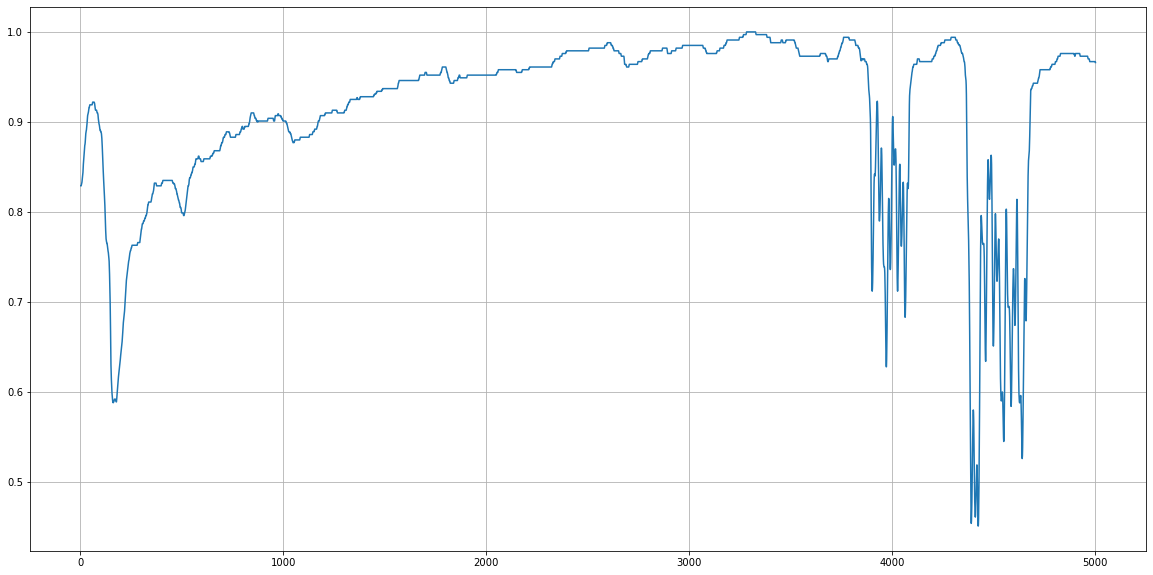

In [75]:
plt.figure(figsize=(20,10))

#plt.plot(first_class.iloc[0,3:5003])
#plt.plot(first_class.iloc[1,3:5003])
#plt.plot(first_class.iloc[2,3:5003])
plt.plot(first_class.iloc[3,3:5003])
#plt.plot(first_class.iloc[4,3:5003])


#plt.plot(labeled.iloc[10,3:5002].values,label =labeled.iloc[10,5003])
#plt.plot(labeled.iloc[100,3:5002].values,label =labeled.iloc[100,5003])
#plt.plot(labeled.iloc[12,3:5002].values,label = labeled.iloc[12,5003])
plt.grid()
#plt.legend()

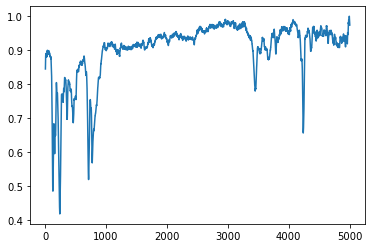

In [76]:
plt.plot(first_class.iloc[4,3:5003])

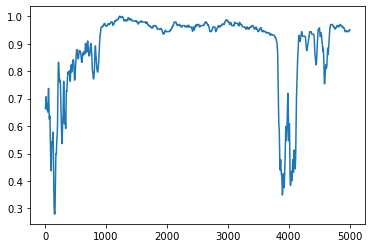

In [77]:
plt.plot(first_class.iloc[6,3:5003])

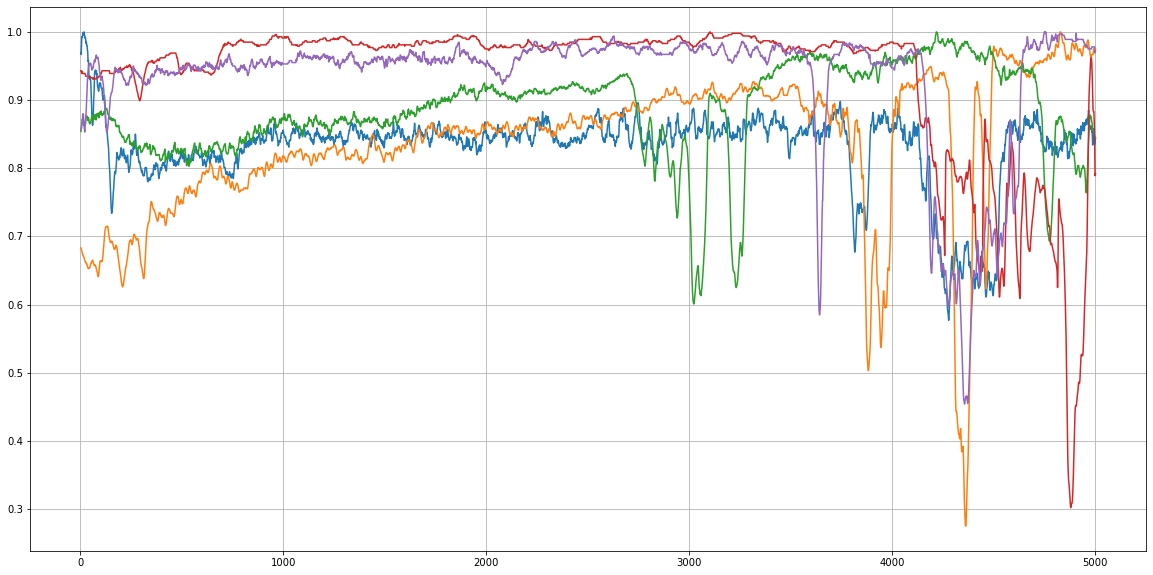

In [61]:
plt.figure(figsize=(20,10))

plt.plot(second_class.iloc[0,3:5003])
plt.plot(second_class.iloc[1,3:5003])
plt.plot(second_class.iloc[2,3:5003])
plt.plot(second_class.iloc[3,3:5003])
plt.plot(second_class.iloc[4,3:5003])
plt.grid()

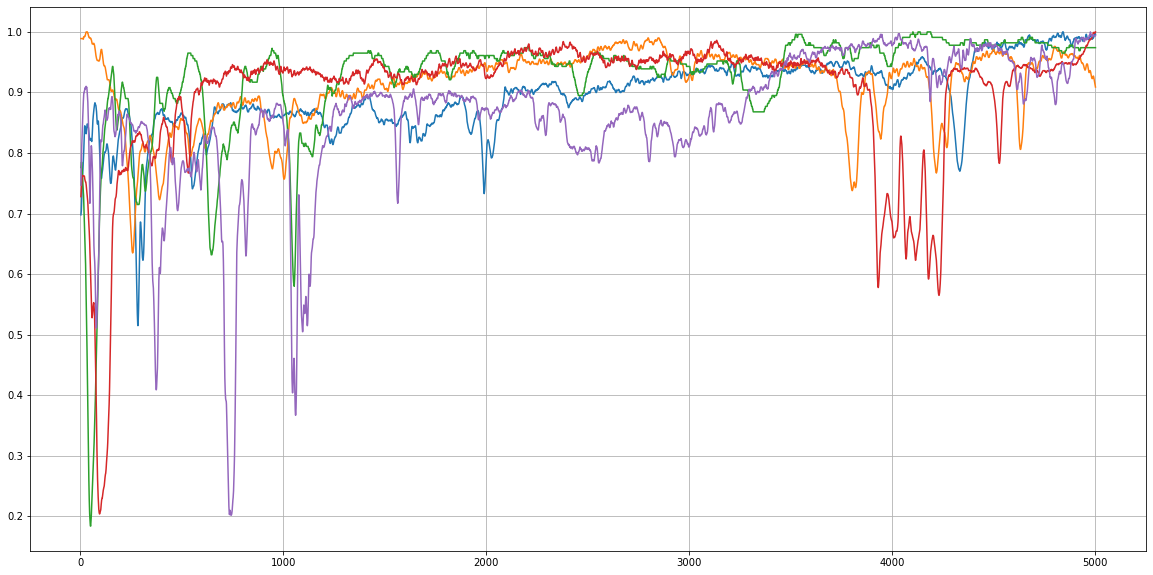

In [63]:
plt.figure(figsize=(20,10))

plt.plot(third_class.iloc[0,3:5003])
plt.plot(third_class.iloc[1,3:5003])
plt.plot(third_class.iloc[2,3:5003])
plt.plot(third_class.iloc[3,3:5003])
plt.plot(third_class.iloc[4,3:5003])
plt.grid()

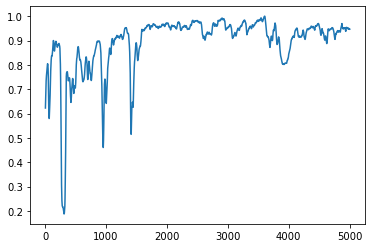

In [81]:
plt.plot(third_class.iloc[10,3:5003])

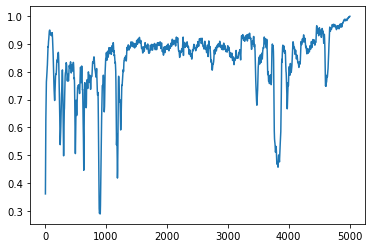

In [83]:
plt.plot(third_class.iloc[11,3:5003])

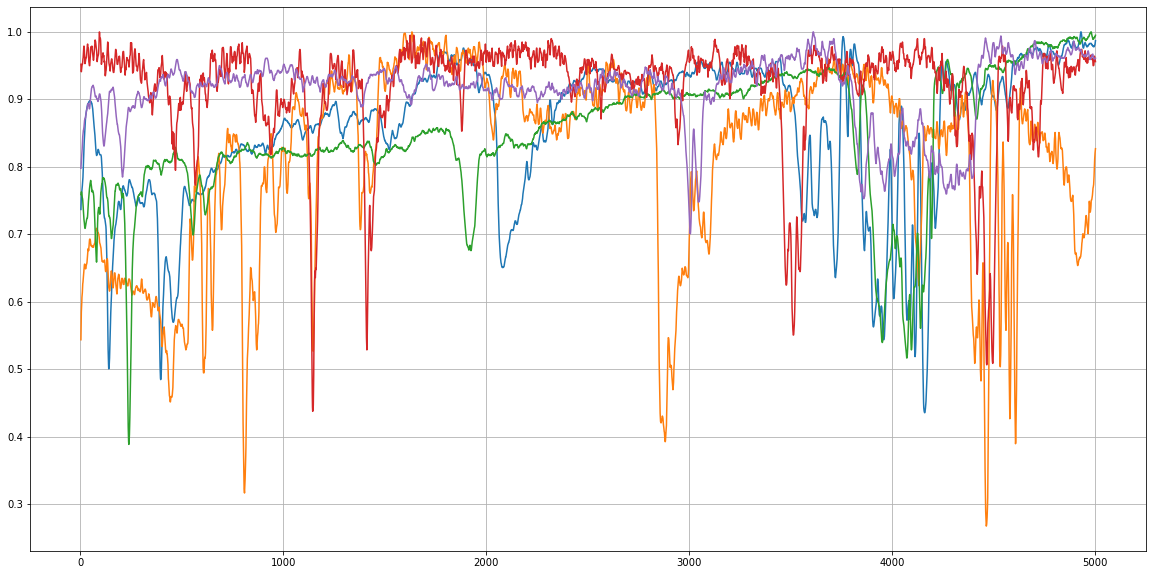

In [66]:
plt.figure(figsize=(20,10))

plt.plot(fourth_class.iloc[0,3:5003])
plt.plot(fourth_class.iloc[1,3:5003])
plt.plot(fourth_class.iloc[2,3:5003])
plt.plot(fourth_class.iloc[3,3:5003])
plt.plot(fourth_class.iloc[4,3:5003])
plt.grid()

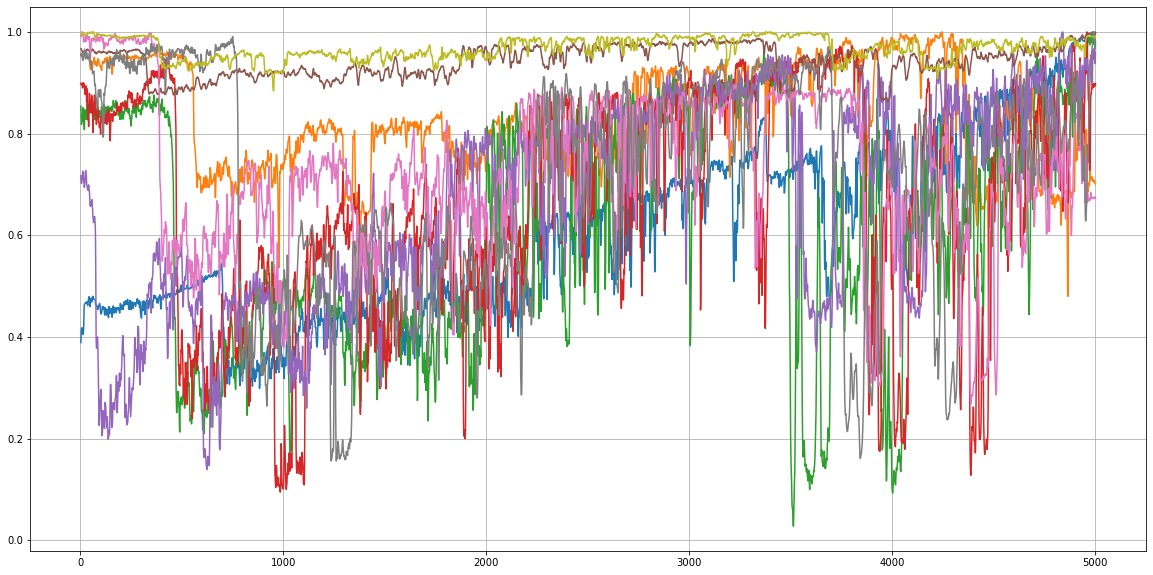

In [69]:
plt.figure(figsize=(20,10))

plt.plot(fifth_class.iloc[0,3:5003])
plt.plot(fifth_class.iloc[1,3:5003])
plt.plot(fifth_class.iloc[2,3:5003])
plt.plot(fifth_class.iloc[3,3:5003])
plt.plot(fifth_class.iloc[4,3:5003])
plt.plot(fifth_class.iloc[5,3:5003])
plt.plot(fifth_class.iloc[6,3:5003])
plt.plot(fifth_class.iloc[7,3:5003])
plt.plot(fifth_class.iloc[8,3:5003])
plt.grid()

In [ ]:
#ARIMA, SARIMA, ARCH, GARCH, MARS, 

In [ ]:
#spectrum Fourier

## Model training

In [180]:
df_clear = labeled.iloc[:,3:5003]

In [181]:
df_clear

,3,4,5,6,7,8,9,10,11,12,...,4993,4994,4995,4996,4997,4998,4999,5000,5001,5002
8,0.570,0.575,0.575,0.571,0.565,0.575,0.579,0.574,0.552,0.538,...,0.831,0.846,0.856,0.857,0.855,0.855,0.855,0.835,0.812,0.799
31,0.662,0.582,0.589,0.637,0.443,0.718,0.524,0.599,0.652,0.531,...,0.543,0.644,0.417,0.505,0.468,0.500,0.508,0.535,0.538,0.408
33,0.389,0.407,0.413,0.417,0.418,0.418,0.416,0.413,0.409,0.407,...,0.993,0.993,0.993,0.994,0.995,0.996,0.998,0.999,1.000,0.998
37,0.756,0.765,0.781,0.793,0.804,0.811,0.819,0.833,0.840,0.854,...,0.948,0.951,0.952,0.951,0.949,0.947,0.948,0.951,0.955,0.954
45,0.498,0.566,0.520,0.458,0.555,0.795,0.546,0.496,0.426,0.531,...,0.397,0.514,0.473,0.412,0.354,0.529,0.550,0.626,0.550,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.361,0.410,0.460,0.505,0.549,0.581,0.606,0.628,0.646,0.666,...,0.997,0.997,0.997,0.998,0.998,0.998,0.999,0.999,1.000,1.000
737,0.599,0.691,0.713,0.716,0.714,0.710,0.708,0.710,0.713,0.715,...,0.902,0.899,0.896,0.893,0.889,0.884,0.875,0.863,0.846,0.821
739,0.664,0.664,0.668,0.669,0.674,0.679,0.686,0.695,0.701,0.703,...,0.948,0.948,0.948,0.949,0.949,0.949,0.950,0.950,0.950,0.951
743,0.920,0.922,0.922,0.920,0.919,0.918,0.916,0.914,0.912,0.912,...,0.982,0.982,0.982,0.982,0.982,0.982,0.982,0.982,0.982,0.982


In [267]:
model = sm.tsa.ARMA(first_class.iloc[1,3:5003].values, order=(5,1,0))

In [268]:
model_fit = model.fit(transparams=False)
# summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(5, 1)   Log Likelihood               29620.757
Method:                       css-mle   S.D. of innovations                nan
Date:                Thu, 12 May 2022   AIC                         -59225.513
Time:                        20:32:00   BIC                         -59173.376
Sample:                             0   HQIC                        -59207.240
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9812      0.002    464.550      0.000       0.977       0.985
ar.L1.y        2.0652      0.082     25.095      0.000       1.904       2.226
ar.L2.y       -1.0741      0.106    -10.105      0.0

In [204]:
output = model_fit.forecast()
output

(array([0.99895129]), array([0.00064581]), array([[0.99768552, 1.00021705]]))

In [205]:
model_fit.arparams

array([ 2.24230892, -1.30086251, -0.05219599,  0.00658001,  0.10405813])

In [206]:
model_fit.resid.sum()

0.00787882812407726

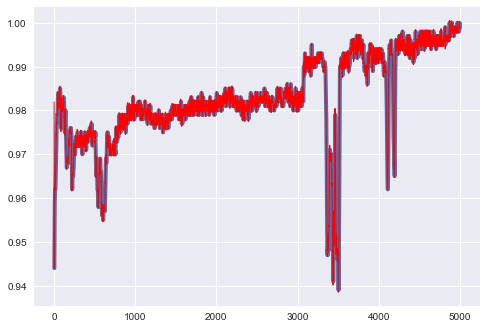

In [214]:
a = model_fit.predict()
plt.plot(first_class.iloc[1,3:5003],linewidth=4)
plt.plot(a,linewidth=1,color='r')

## Part 2

In [291]:
def coef_finding(data,value=True):
    coef = []
    
    if value:
        model = sm.tsa.ARMA(data, order=(10,1,0))
        model_fit = model.fit(transparams=False)
        coef.append(model_fit.arparams)
        return coef
    else:
        for i in range(0,len(data)):
           # print(i)
            try:
                model = sm.tsa.ARMA(data.iloc[i,3:5003], order=(10,1,0))
                model_fit = model.fit(transparams=False)
            except ValueError:
                model = sm.tsa.ARMA(data.iloc[i,3:5003], order=(5,1))
                model_fit = model.fit(transparams=False)
            coef.append(model_fit.arparams)
        mean = np.zeros_like(coef[0])
        for i in range(0,len(coef)):
            a = coef[i]
            for j in range(0,len(a)):
                mean[j] += a[j]
        return mean/len(data)

In [285]:
coef_per_cluster = []
for i in range(0,9):
    
    data = labeled[labeled.iloc[:,5003] == i]
    
    
    coef = coef_finding(data)
    coef_per_cluster.append(coef)
    print(f'Coefficients of {i} group of clusters {coef}')
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Coefficients of 0 group of clusters [ 1.78999197 -0.5982914  -0.27284396 -0.01991547  0.09977739  0.0313109
 -0.01149577 -0.01844317 -0.0295834   0.02841161]
0
1
2
3
4
5
6
Coefficients of 1 group of clusters [ 2.00781015 -1.08743675 -0.11716672  0.30074189 -0.07222929 -0.08767132
  0.04697035 -0.02522523  0.0555831  -0.02395728]
0
1
2
3
4
Coefficients of 2 group of clusters [ 1.66143080e+00 -6.13790432e-01 -1.06791936e-01  9.75488922e-03
  1.71557636e-01 -1.09154536e-01  6.04739861e-03 -5.26511964e-02
  3.12316254e-02  5.85941313e-04]
0
1
2
3
4
5
6
7
8
9
10
11
Coefficients of 3 group of clusters [ 2.03260809 -1.02943508 -0.08050366  0.02575318  0.09007987 -0.05032023
  0.00748495  0.00618853 -0.03056001  0.02826263]
0
1
2
3
4
Coefficients of 4 group of clusters [ 1.98042508 -1.07638924  0.07339093  0.06258043 -0.0672964   0.03084466
 -0.06447082  0.03898889  0.03806509 -0.0181091 ]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Co

In [322]:
### finding similarity between values and clusterf
unlabeled = df[df[5003] == -1]


def similarity_search(data,coef_per_cluster,value=True):
    norm = coef_finding(data,value)
    for i,coef in enumerate(coef_per_cluster):
     #   print(i)
        if i == 0:
            cluster = 0
            minus_norm = np.linalg.norm(norm-coef)
        #    print(minus_norm)
        else:
            sec_norm = np.linalg.norm(norm-coef)
         #   print(sec_norm)
            if sec_norm<minus_norm:
                minus_norm = sec_norm
                cluster = i
    return cluster

In [325]:
unlabeled

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
0,168,3642.317,-107.175,0.558,0.595,0.519,0.742,0.664,0.467,0.426,...,0.606,0.523,0.607,0.629,0.664,-1,7,-1,-1,-1
1,307,4034.298,-668.198,0.650,0.457,0.572,0.644,0.581,0.525,0.645,...,0.397,0.579,0.636,0.570,0.530,-1,7,-1,-1,-1
2,668,4358.001,1703.199,0.638,0.621,0.646,0.495,0.510,0.611,0.574,...,0.569,0.587,0.541,0.412,0.519,-1,7,-1,-1,-1
3,229,2786.060,75.125,0.917,0.917,0.916,0.912,0.908,0.905,0.904,...,0.943,0.943,0.943,0.943,0.943,-1,7,-1,-1,-1
4,316,988.637,-492.056,0.359,0.364,0.379,0.396,0.404,0.405,0.392,...,0.626,0.606,0.629,0.674,0.727,-1,6,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,498,2648.039,-1611.818,0.633,0.550,0.548,0.531,0.621,0.565,0.628,...,0.515,0.642,0.373,0.517,0.520,-1,-1,-1,-1,-1
756,575,1763.934,67.286,0.842,0.852,0.859,0.865,0.870,0.877,0.876,...,0.990,0.985,0.985,0.986,0.986,-1,-1,-1,-1,-1
757,430,2138.580,1029.394,0.777,0.789,0.800,0.808,0.817,0.824,0.831,...,0.993,0.994,0.995,0.993,0.990,-1,-1,-1,-1,-1
758,722,4078.672,971.900,0.405,0.475,0.503,0.370,0.472,0.481,0.566,...,0.544,0.643,0.489,0.391,0.463,-1,-1,-1,-1,-1


In [329]:
df[df[5003] == -1]

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
0,168,3642.317,-107.175,0.558,0.595,0.519,0.742,0.664,0.467,0.426,...,0.606,0.523,0.607,0.629,0.664,-1,-1,-1,-1,-1
1,307,4034.298,-668.198,0.650,0.457,0.572,0.644,0.581,0.525,0.645,...,0.397,0.579,0.636,0.570,0.530,-1,-1,-1,-1,-1
2,668,4358.001,1703.199,0.638,0.621,0.646,0.495,0.510,0.611,0.574,...,0.569,0.587,0.541,0.412,0.519,-1,-1,-1,-1,-1
3,229,2786.060,75.125,0.917,0.917,0.916,0.912,0.908,0.905,0.904,...,0.943,0.943,0.943,0.943,0.943,-1,-1,-1,-1,-1
4,316,988.637,-492.056,0.359,0.364,0.379,0.396,0.404,0.405,0.392,...,0.626,0.606,0.629,0.674,0.727,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,498,2648.039,-1611.818,0.633,0.550,0.548,0.531,0.621,0.565,0.628,...,0.515,0.642,0.373,0.517,0.520,-1,-1,-1,-1,-1
756,575,1763.934,67.286,0.842,0.852,0.859,0.865,0.870,0.877,0.876,...,0.990,0.985,0.985,0.986,0.986,-1,-1,-1,-1,-1
757,430,2138.580,1029.394,0.777,0.789,0.800,0.808,0.817,0.824,0.831,...,0.993,0.994,0.995,0.993,0.990,-1,-1,-1,-1,-1
758,722,4078.672,971.900,0.405,0.475,0.503,0.370,0.472,0.481,0.566,...,0.544,0.643,0.489,0.391,0.463,-1,-1,-1,-1,-1


In [330]:
for i in range(0,len(df[df[5003] == -1])):
    try:
        df[df[5003] == -1].iloc[i,5003] = similarity_search(df[df[5003] == -1].iloc[i,3:5002],coef_per_cluster,value=True)
    except (ValueError,np.linalg.LinAlgError):
        continue
    
    
    

KeyboardInterrupt: 

In [314]:
unlabeled

,0,1,2,3,4,5,6,7,8,9,...,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
0,168,3642.317,-107.175,0.558,0.595,0.519,0.742,0.664,0.467,0.426,...,0.606,0.523,0.607,0.629,0.664,-1,-1,-1,-1,-1
1,307,4034.298,-668.198,0.650,0.457,0.572,0.644,0.581,0.525,0.645,...,0.397,0.579,0.636,0.570,0.530,-1,-1,-1,-1,-1
2,668,4358.001,1703.199,0.638,0.621,0.646,0.495,0.510,0.611,0.574,...,0.569,0.587,0.541,0.412,0.519,-1,-1,-1,-1,-1
3,229,2786.060,75.125,0.917,0.917,0.916,0.912,0.908,0.905,0.904,...,0.943,0.943,0.943,0.943,0.943,-1,-1,-1,-1,-1
4,316,988.637,-492.056,0.359,0.364,0.379,0.396,0.404,0.405,0.392,...,0.626,0.606,0.629,0.674,0.727,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,498,2648.039,-1611.818,0.633,0.550,0.548,0.531,0.621,0.565,0.628,...,0.515,0.642,0.373,0.517,0.520,-1,-1,-1,-1,-1
756,575,1763.934,67.286,0.842,0.852,0.859,0.865,0.870,0.877,0.876,...,0.990,0.985,0.985,0.986,0.986,-1,-1,-1,-1,-1
757,430,2138.580,1029.394,0.777,0.789,0.800,0.808,0.817,0.824,0.831,...,0.993,0.994,0.995,0.993,0.990,-1,-1,-1,-1,-1
758,722,4078.672,971.900,0.405,0.475,0.503,0.370,0.472,0.481,0.566,...,0.544,0.643,0.489,0.391,0.463,-1,-1,-1,-1,-1
